
# 🏥 Caso de Estudio: Entrega de Medicamentos en Zona Rural

## 📄 Descripción
Una ONG necesita planificar la ruta de un robot autónomo que transporta medicamentos desde un almacén hasta una clínica rural.  
El terreno es una cuadrícula de 20x20 con obstáculos como ríos, rocas y caminos cerrados.

## 🎯 Objetivo
Encontrar la **ruta más corta y segura** desde el punto de inicio hasta el destino, evitando obstáculos mediante algoritmos heurísticos de planificación.

## 🧪 Actividad
- Modelar el espacio como una matriz.
- Implementar A* e IDA*.
- Usar la heurística de distancia Manhattan.
- Visualizar y comparar los caminos encontrados.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import heapq
import random
import time
import matplotlib.patches as patches

# Parámetros
GRID_SIZE = 20
START = (0, 0)
GOAL = (19, 19)
OBSTACLE_PERCENTAGE = 0.2

np.random.seed(42)
grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)
num_obstacles = int(GRID_SIZE * GRID_SIZE * OBSTACLE_PERCENTAGE)
obstacles = random.sample([(i, j) for i in range(GRID_SIZE) for j in range(GRID_SIZE)
                           if (i, j) != START and (i, j) != GOAL], num_obstacles)
for (i, j) in obstacles:
    grid[i][j] = 1

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])



## ⭐ Algoritmo A*

A* combina el costo real desde el inicio \( g(n) \) con una heurística estimada \( h(n) \) hacia el objetivo.  
La fórmula utilizada es:  
\[
f(n) = g(n) + h(n)
\]


In [2]:

def astar(grid, start, goal):
    neighbors = [(0,1),(1,0),(-1,0),(0,-1)]
    open_set = []
    heapq.heappush(open_set, (0 + heuristic(start, goal), 0, start, []))
    visited = set()
    while open_set:
        f, cost, current, path = heapq.heappop(open_set)
        if current in visited:
            continue
        visited.add(current)
        path = path + [current]
        if current == goal:
            return path
        for dx, dy in neighbors:
            neighbor = (current[0] + dx, current[1] + dy)
            if (0 <= neighbor[0] < GRID_SIZE and
                0 <= neighbor[1] < GRID_SIZE and
                grid[neighbor[0]][neighbor[1]] == 0 and
                neighbor not in visited):
                heapq.heappush(open_set, (cost + 1 + heuristic(neighbor, goal), cost + 1, neighbor, path))
    return []



## 🔁 Algoritmo IDA*

IDA* utiliza búsqueda en profundidad iterativa combinada con heurística.  
Es útil cuando se dispone de poca memoria, aunque puede tardar más tiempo.


In [3]:

def ida_star(start, goal, grid):
    def dfs(path, g, threshold):
        node = path[-1]
        f = g + heuristic(node, goal)
        if f > threshold:
            return f
        if node == goal:
            return path
        min_threshold = float('inf')
        for dx, dy in [(0,1), (1,0), (-1,0), (0,-1)]:
            neighbor = (node[0] + dx, node[1] + dy)
            if (0 <= neighbor[0] < GRID_SIZE and
                0 <= neighbor[1] < GRID_SIZE and
                grid[neighbor[0]][neighbor[1]] == 0 and
                neighbor not in path):
                path.append(neighbor)
                result = dfs(path, g + 1, threshold)
                if isinstance(result, list):
                    return result
                if result < min_threshold:
                    min_threshold = result
                path.pop()
        return min_threshold

    threshold = heuristic(start, goal)
    path = [start]
    while True:
        result = dfs(path, 0, threshold)
        if isinstance(result, list):
            return result
        if result == float('inf'):
            return []
        threshold = result


In [4]:

start_time_a = time.time()
path_a = astar(grid, START, GOAL)
time_a = time.time() - start_time_a

start_time_ida = time.time()
path_ida = ida_star(START, GOAL, grid)
time_ida = time.time() - start_time_ida

print("A* - Tiempo:", round(time_a, 4), "s - Longitud del camino:", len(path_a))
print("IDA* - Tiempo:", round(time_ida, 4), "s - Longitud del camino:", len(path_ida))


A* - Tiempo: 0.0009 s - Longitud del camino: 39
IDA* - Tiempo: 0.0003 s - Longitud del camino: 39


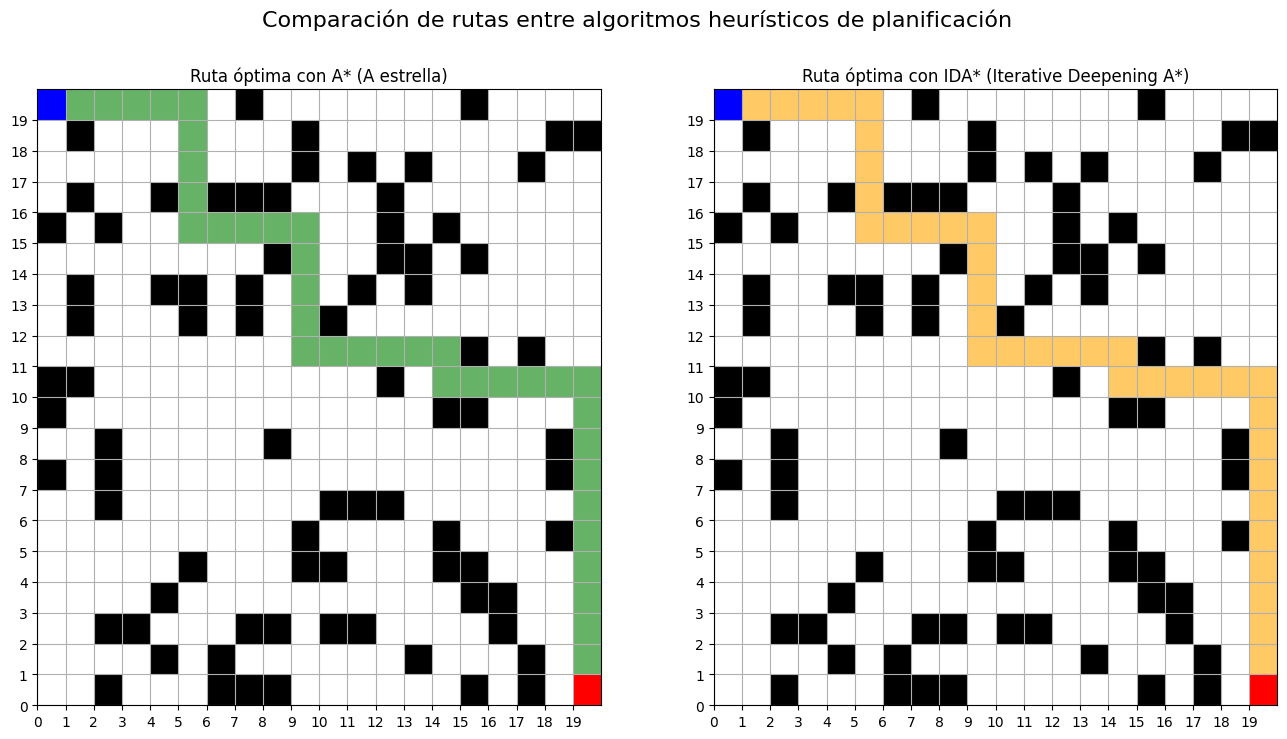

In [5]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
axes = [ax1, ax2]
titles = ["A* (A estrella)", "IDA* (Iterative Deepening A*)"]
paths = [path_a, path_ida]
colors = ['green', 'orange']

for ax, path, title, color in zip(axes, paths, titles, colors):
    ax.set_xlim(0, GRID_SIZE)
    ax.set_ylim(0, GRID_SIZE)
    ax.set_xticks(range(GRID_SIZE))
    ax.set_yticks(range(GRID_SIZE))
    ax.grid(True)

    for (i, j) in obstacles:
        rect = patches.Rectangle((j, GRID_SIZE - 1 - i), 1, 1, linewidth=0, facecolor='black')
        ax.add_patch(rect)

    for (i, j) in path:
        rect = patches.Rectangle((j, GRID_SIZE - 1 - i), 1, 1, linewidth=0, facecolor=color, alpha=0.6)
        ax.add_patch(rect)

    ax.add_patch(patches.Rectangle((START[1], GRID_SIZE - 1 - START[0]), 1, 1, linewidth=0, facecolor='blue'))
    ax.add_patch(patches.Rectangle((GOAL[1], GRID_SIZE - 1 - GOAL[0]), 1, 1, linewidth=0, facecolor='red'))

    ax.set_title(f"Ruta óptima con {title}")

plt.suptitle("Comparación de rutas entre algoritmos heurísticos de planificación", fontsize=16)
plt.show()



## ✅ Conclusiones

- **A\*** encontró la ruta más corta en menor tiempo, pero consume más memoria al mantener todos los caminos posibles abiertos.
- **IDA\*** es más eficiente en el uso de memoria, pero puede ser más lento debido a búsquedas iterativas repetidas.
- Ambos algoritmos hallaron soluciones viables, siendo útiles según el contexto (velocidad vs. memoria).
